<a href="https://colab.research.google.com/github/apinee/Data_Science/blob/main/Predicting_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [ ]:
url='http://bit.ly/w-data'
st_data=pd.read_csv(url)

In [ ]:
st_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
st_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
x=st_data['Hours']
y=st_data['Scores']

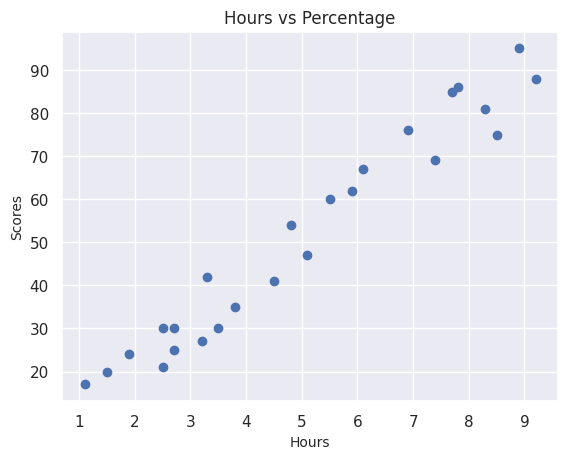

In [ ]:
plt.scatter(x,y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours',fontsize=10)
plt.ylabel('Scores',fontsize=10)
plt.show()

In [ ]:
X=x.values.reshape(-1,1)
Y=y.values.reshape(-1,1)


**Spliting data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=69)

In [ ]:
st_reg=LinearRegression()
st_reg.fit(x_train,y_train)
print('Model Training Completed')

Model Training Completed


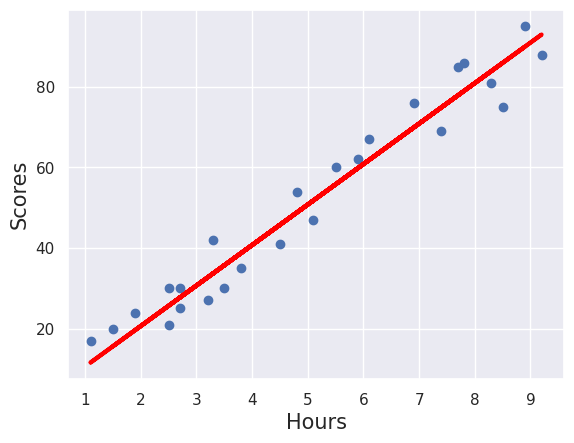

In [ ]:
y_hat=st_reg.coef_*X+st_reg.intercept_

plt.scatter(X,Y)
plt.plot(X,y_hat,c='red',lw=3)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

# # Predicting values with model and comparing with actual values

In [ ]:
y_predict =st_reg.predict(x_test)

In [ ]:
df = pd.DataFrame(y_test, columns = ['Actual Score'])
df

,Actual Score
0,69
1,67
2,30
3,54
4,17


In [ ]:
df['Predicted score'] =y_predict
df

,Actual Score,Predicted score
0,69,74.905761
1,67,61.844106
2,30,25.673372
3,54,48.782452
4,17,11.606975


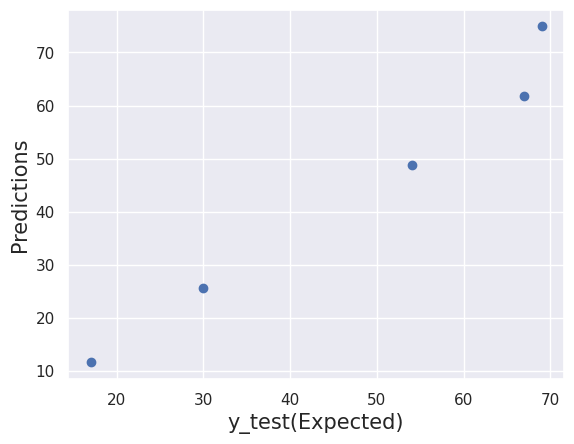

In [ ]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test(Expected)',size=15)
plt.ylabel('Predictions',size=15)
plt.show()


In [ ]:
hours=[[9.25, ]]
own_pred=st_reg.predict(hours)
print("No of Hours= {}".format(hours))
print("Predicted score= {}".format(own_pred[0]))

No of Hours= [[9.25]]
Predicted score= [93.49349906]


In [ ]:
## Predicting value of Given 9.25 hours study time
hours = [[9.25, ]]
own_pred = st_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.49349906]


In [ ]:
## Calculating Root mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('Mean square error: ', mse)
print('Root mean square error: ', rmse)


Mean square error:  27.29769538229271
Root mean square error:  5.224719646286555


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predict)
print('Mean absolute error: ',mae)

Mean absolute error:  5.199770934490488


In [ ]:
## Calculating R-squared
r2 = st_reg.score(x_train, y_train)
print('R-squared: ', r2)



R-squared:  0.953896720241372


In [ ]:
## Calculating adjt. R-squared
n = x_train.shape[0]
p = x_train.shape[1]
adjust_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('Adjusted R-squared: ',adjust_r2)

Adjusted R-squared:  0.9513354269214481
